<a href="https://colab.research.google.com/github/dwikyrf/Project_Dicoding/blob/main/Dwiky_Rahmat_Intel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #PROFIL DICODING : Dwiky Rahmat

In [ ]:
import tensorflow as tf
import matplotlib.image as mpimg
import zipfile
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files
from keras.preprocessing import image
from keras.callbacks import ReduceLROnPlateau

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dwikyrahmatfadhila","key":"47649f50c01f68baf73ab2af1f3aee08"}'}

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! KAGGLE_CONFIG_DIR=/content/ kaggle datasets download -d puneet6060/intel-image-classification

 96% 331M/346M [00:01<00:00, 220MB/s]
100% 346M/346M [00:01<00:00, 203MB/s]


In [ ]:
local_zip = '/content/intel-image-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()
base_dir = '/content/seg_train/'
data_dir_train = os.path.join(base_dir, 'seg_train')
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
IMAGE_SIZE = (150,150)

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'nearest',
                validation_split=0.2)

validation_datagen = ImageDataGenerator(
                rescale = 1.0/255,
                validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        data_dir_train,
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = validation_datagen.flow_from_directory(
        data_dir_train,
        target_size=(150,150),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator,
    callbacks = myCallback())

Epoch 1/30
351/351 [==============================] - 63s 179ms/step - loss: 1.2450 - accuracy: 0.5217 - val_loss: 0.9261 - val_accuracy: 0.6480
Epoch 2/30
351/351 [==============================] - 69s 198ms/step - loss: 0.9958 - accuracy: 0.6065 - val_loss: 0.7993 - val_accuracy: 0.7236
Epoch 3/30
351/351 [==============================] - 68s 193ms/step - loss: 0.8930 - accuracy: 0.6510 - val_loss: 0.7211 - val_accuracy: 0.7518
Epoch 4/30
351/351 [==============================] - 64s 181ms/step - loss: 0.8055 - accuracy: 0.7009 - val_loss: 0.6659 - val_accuracy: 0.7735
Epoch 5/30
351/351 [==============================] - 62s 177ms/step - loss: 0.7515 - accuracy: 0.7197 - val_loss: 0.6088 - val_accuracy: 0.7892
Epoch 6/30
351/351 [==============================] - 63s 180ms/step - loss: 0.7137 - accuracy: 0.7412 - val_loss: 0.6221 - val_accuracy: 0.7693
Epoch 7/30
351/351 [==============================] - 62s 176ms/step - loss: 0.6762 - accuracy: 0.7533 - val_loss: 0.6115 - val_ac

In [ ]:
def eval_plot(history):

  plt.figure(figsize=(14, 5))

  plt.subplot(1, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  plt.subplot(1, 2, 2)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

In [ ]:
 def evaluate(model):

  validation_generator = train_datagen.flow_from_directory(
          data_dir_train,
          target_size=(150,150),
          batch_size=32,
          class_mode='categorical',
          shuffle = False,
          subset='validation')

  batch_size = 32
  num_of_test_samples = len(validation_generator.filenames)

  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  print(confusion_matrix(validation_generator.classes, y_pred))


  print('\n\nClassification Report\n')
  target_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
  print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Found 2804 images belonging to 6 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  



Confusion Matrix

[[379   6   7  11   5  30]
 [  5 438   1   5   1   4]
 [  3   4 360  94  13   6]
 [  3   2  47 438  10   2]
 [ 13   1  22  48 364   6]
 [ 73   7   2   4   5 385]]


Classification Report

              precision    recall  f1-score   support

    mountain       0.80      0.87      0.83       438
      street       0.96      0.96      0.96       454
     glacier       0.82      0.75      0.78       480
   buildings       0.73      0.87      0.79       502
         sea       0.91      0.80      0.85       454
      forest       0.89      0.81      0.85       476

    accuracy                           0.84      2804
   macro avg       0.85      0.84      0.84      2804
weighted avg       0.85      0.84      0.84      2804



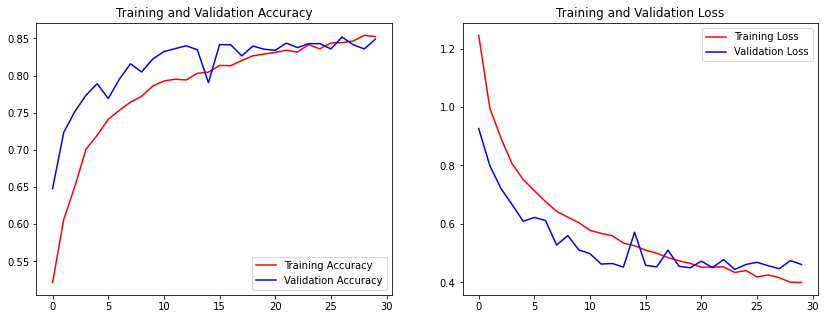

In [ ]:
eval_plot(history)
evaluate(model)

In [ ]:
import pathlib
export_dir = 'saved_model/'
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('submission3.tflite')
tflite_model_file.write_bytes(tflite_model)

9848832